# Connect to Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Libraries


In [ ]:
import sys, os
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adagrad,Adamax,Nadam,Ftrl
from tensorflow.keras.regularizers import l2
from keras.utils import np_utils

# Importing the dataset


In [ ]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

df=pd.read_csv('/content/gdrive/MyDrive/Datasets/Fer2013/fer2013.csv') #/content/gdrive/MyDrive/Datasets/Fer2013

# print(df.info())
# print(df["Usage"].value_counts())

# print(df.head())
X_train,train_y,X_test,test_y=[],[],[],[]

for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [ ]:
# print(f"shape:{X_train.shape}")

X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

num_labels = 7

train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [ ]:
print(X_train.shape, train_y.shape, X_test.shape, test_y.shape)

(28709, 48, 48, 1) (28709, 7) (3589, 48, 48, 1) (3589, 7)


In [ ]:
# don't run
train_dir = "../input/fer2013/train/"
test_dir = "../input/fer2013/test/"
total_labels = len(os.listdir(train_dir))

fig, ax = plt.subplots(nrows=5, ncols=total_labels, figsize=(35, 25))
for x in range(5):
    for y,v in zip(range(total_labels),os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir+v+'/'+os.listdir(train_dir+v)[x]), cmap='gray')

plt.show()

FileNotFoundError: ignored

In [ ]:
# don't run
df = {}
for i in os.listdir(train_dir):
    directory = train_dir + i
    df[i] = len(os.listdir(directory))
df = pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=df.index, y="total", palette="rocket", data=df)
plt.ylabel("count")
plt.title("Total images of each label in train dataset")
plt.show()

# MODEL 1

In [ ]:

#num_features = 64
num_labels = 7
batch_size = 256
epochs = 100
width, height = 48, 48


##designing the cnn
#1st convolution layer
model = Sequential()

model.add(Conv2D(48, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(48,kernel_size= (3, 3), activation='relu'))
model.add(Conv2D(48,kernel_size= (3, 3), activation='relu'))
model.add(Conv2D(48,kernel_size= (3, 3), activation='relu'))
model.add(Conv2D(48,kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu'))
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu'))
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu'))
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.1))

#3rd convolution layer
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

#model.summary()

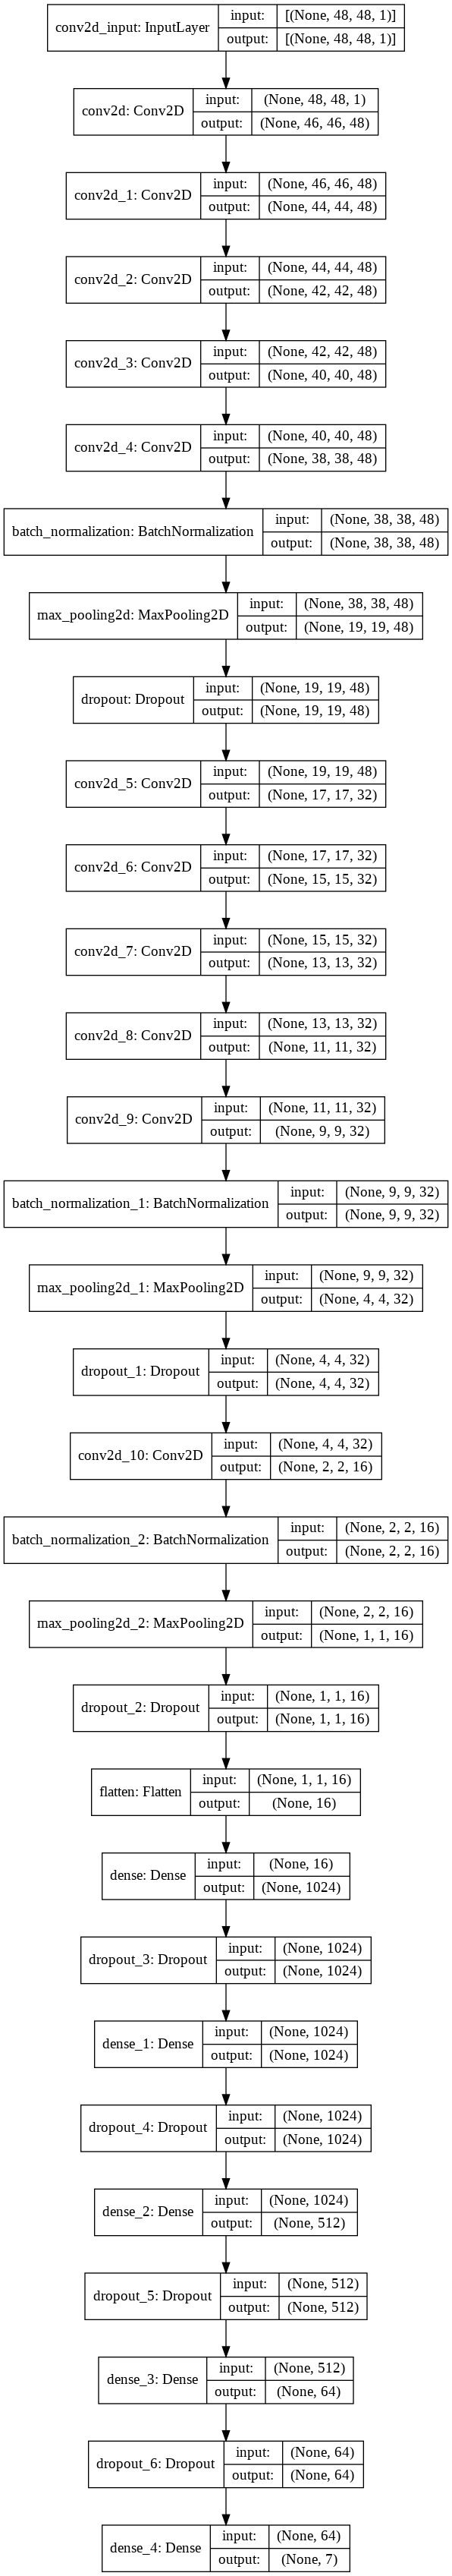

In [ ]:
import pydot
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# check points and early stopping
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

model_name = "model_1_run_2"
filepath="/content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Checkpoints/"  + model_name + "weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5"
print(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=15)
callbacks_list = [es, checkpoint]

/content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Checkpoints/model_1_run_2weights-improvement-{epoch:02d}-{accuracy:.4f}.hdf5


In [ ]:
#Compliling the model
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs = 100
batch_size = 256

#Training the model
H = model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split = 0.2,
          shuffle=True,
          callbacks= callbacks_list)

Epoch 1/100
90/90 [==============================] - 55s 257ms/step - loss: 1.8383 - accuracy: 0.2285 - val_loss: 1.8824 - val_accuracy: 0.2517

Epoch 00001: accuracy improved from -inf to 0.22850, saving model to /content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Checkpoints/model_1_run_2weights-improvement-01-0.2285.hdf5
Epoch 2/100
90/90 [==============================] - 21s 228ms/step - loss: 1.7982 - accuracy: 0.2511 - val_loss: 1.8416 - val_accuracy: 0.1714

Epoch 00002: accuracy improved from 0.22850 to 0.25110, saving model to /content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Checkpoints/model_1_run_2weights-improvement-02-0.2511.hdf5
Epoch 3/100
90/90 [==============================] - 21s 229ms/step - loss: 1.7691 - accuracy: 0.2661 - val_loss: 1.8438 - val_accuracy: 0.1714

Epoch 00003: accuracy improved from 0.25110 to 0.26612, saving model to /content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Checkpoints/model_1_run_2weights-improvement-03-0.2661.

In [ ]:
score = model.evaluate(X_test, test_y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

113/113 [==============================] - 2s 14ms/step - loss: 1.5171 - accuracy: 0.5171
Test loss: 1.5170559883117676
Test accuracy: 0.5171356797218323


In [ ]:
#Saving the  model to  use it later on

model.save_weights("/content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Saved Model/fer_97_58_58.h5")

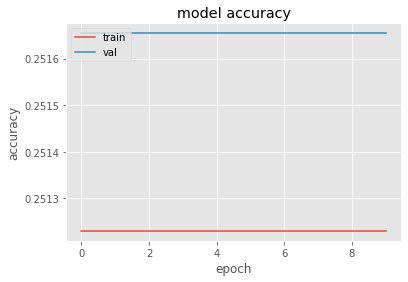

In [ ]:
import matplotlib.pyplot as plt
history = H
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

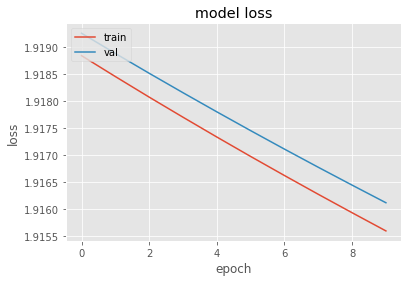

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

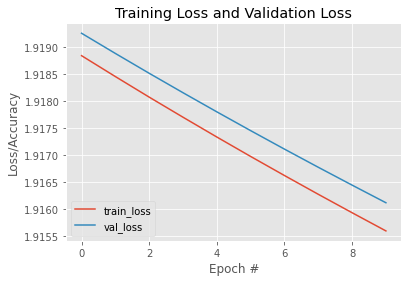

In [ ]:
# construct a plot that plots and saves the training history
import matplotlib.pyplot as plt
N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

base_path_graphs = '/content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Graphs/Train_loss_Val_loss_58.png'
plt.savefig(base_path_graphs, dpi=1000, bbox_inches='tight')
#files.download( "Train_Accuracy.png" )

In [ ]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[242   0  32  50  43  11  89]
 [ 34   6   2   3   4   1   6]
 [101   0 108  35 101  33 118]
 [ 43   0   6 683  32  20 111]
 [102   0  36  55 235  12 213]
 [ 19   0  35  29   8 280  44]
 [ 66   1  13  60  72   7 388]]
Normalized confusion matrix
[[0.52 0.   0.07 0.11 0.09 0.02 0.19]
 [0.61 0.11 0.04 0.05 0.07 0.02 0.11]
 [0.2  0.   0.22 0.07 0.2  0.07 0.24]
 [0.05 0.   0.01 0.76 0.04 0.02 0.12]
 [0.16 0.   0.06 0.08 0.36 0.02 0.33]
 [0.05 0.   0.08 0.07 0.02 0.67 0.11]
 [0.11 0.   0.02 0.1  0.12 0.01 0.64]]


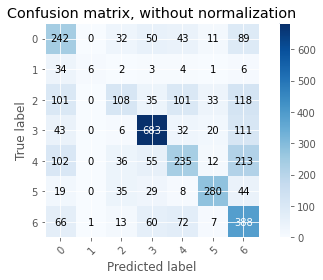

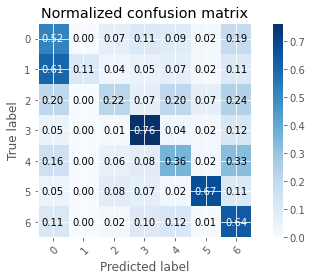

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_test_argmax = test_y.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

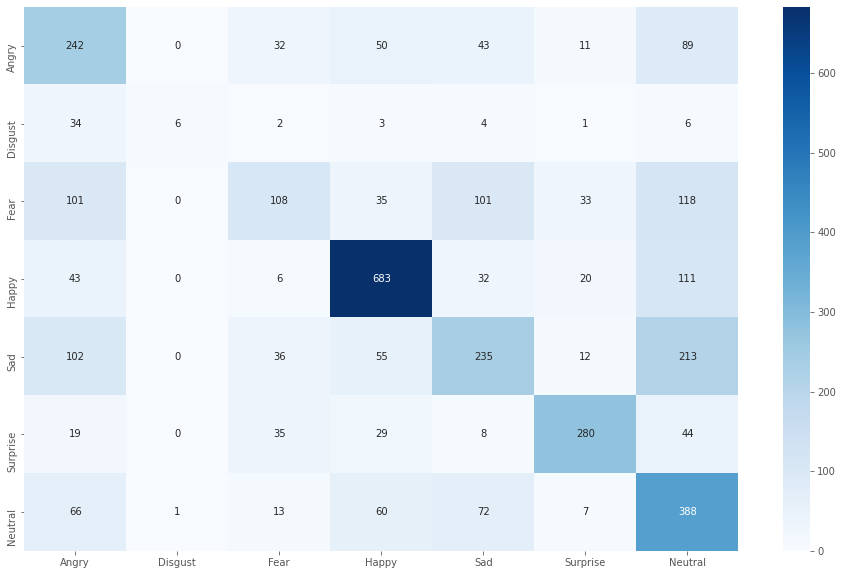

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_test_argmax = test_y.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])



cm = confusion_matrix(y_test_argmax, y_pred_argmax)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='.0f', xticklabels=class_names, yticklabels=class_names)

base_path_graphs = '/content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Graphs/Train_loss_Val_loss_58.png'
plt.savefig(base_path_graphs, dpi=1000, bbox_inches='tight')


Confusion Matrix
[[242   0  32  50  43  11  89]
 [ 34   6   2   3   4   1   6]
 [101   0 108  35 101  33 118]
 [ 43   0   6 683  32  20 111]
 [102   0  36  55 235  12 213]
 [ 19   0  35  29   8 280  44]
 [ 66   1  13  60  72   7 388]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.40      0.52      0.45       467
     Disgust       0.86      0.11      0.19        56
        Fear       0.47      0.22      0.30       496
       Happy       0.75      0.76      0.75       895
         Sad       0.47      0.36      0.41       653
    Surprise       0.77      0.67      0.72       415
     Neutral       0.40      0.64      0.49       607

    accuracy                           0.54      3589
   macro avg       0.59      0.47      0.47      3589
weighted avg       0.56      0.54      0.53      3589



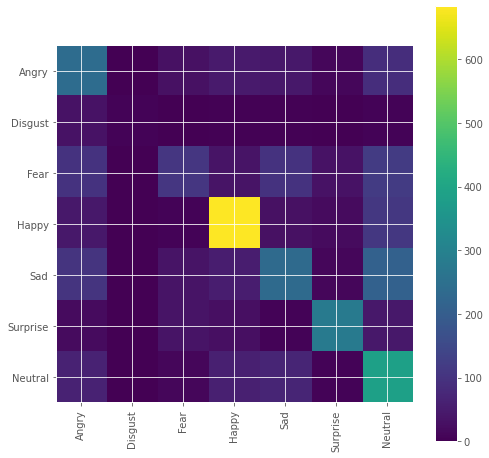

In [ ]:
y_pred = model.predict(X_test)
y_test_argmax = test_y.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])


from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(y_test_argmax, y_pred_argmax)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_names)
print(classification_report(y_test_argmax, y_pred_argmax, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

Confusion Matrix
[[242   0  32  50  43  11  89]
 [ 34   6   2   3   4   1   6]
 [101   0 108  35 101  33 118]
 [ 43   0   6 683  32  20 111]
 [102   0  36  55 235  12 213]
 [ 19   0  35  29   8 280  44]
 [ 66   1  13  60  72   7 388]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.40      0.52      0.45       467
     Disgust       0.86      0.11      0.19        56
        Fear       0.47      0.22      0.30       496
       Happy       0.75      0.76      0.75       895
         Sad       0.47      0.36      0.41       653
    Surprise       0.77      0.67      0.72       415
     Neutral       0.40      0.64      0.49       607

    accuracy                           0.54      3589
   macro avg       0.59      0.47      0.47      3589
weighted avg       0.56      0.54      0.53      3589



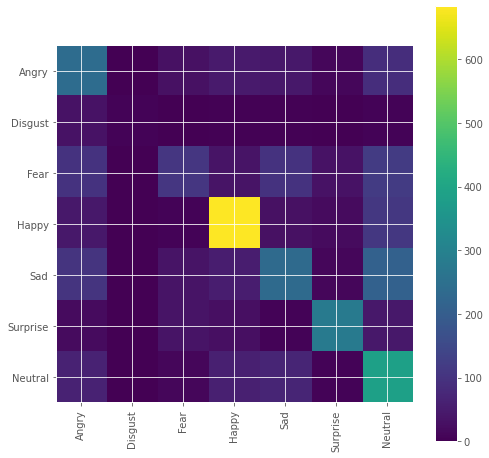

In [ ]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
class_labels = class_labels
#class_labels = {v:k for k,v in class_labels.items()}

y_pred = model.predict(X_test)
y_test_argmax = test_y.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(y_test_argmax, y_pred_argmax)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_names)
print(classification_report(y_test_argmax, y_pred_argmax, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [ ]:
#Refernces
1. https://www.kaggle.com/anantgupt/facial-emotion-recogination-91-accuracy-train-set 
2. 

In [ ]:
from keras.models import load_model
model_loaded = load_model('/content/gdrive/MyDrive/Thesis/Emotion Recognition Fer2013/Checkpoints/3weights-improvement-100-0.8191.hdf5')

In [ ]:
import matplotlib.pyplot as plt


Confusion matrix, without normalization
[[171   8  72  42  53  18 103]
 [ 19  18   4   3   5   2   5]
 [ 54   2 134  37  78  68 123]
 [ 16   0  23 681  24  38 113]
 [ 75   1  58  59 185  21 254]
 [ 13   0  24  16   9 321  32]
 [ 35   1  24  62  46  18 421]]
Normalized confusion matrix
[[0.37 0.02 0.15 0.09 0.11 0.04 0.22]
 [0.34 0.32 0.07 0.05 0.09 0.04 0.09]
 [0.11 0.   0.27 0.07 0.16 0.14 0.25]
 [0.02 0.   0.03 0.76 0.03 0.04 0.13]
 [0.11 0.   0.09 0.09 0.28 0.03 0.39]
 [0.03 0.   0.06 0.04 0.02 0.77 0.08]
 [0.06 0.   0.04 0.1  0.08 0.03 0.69]]


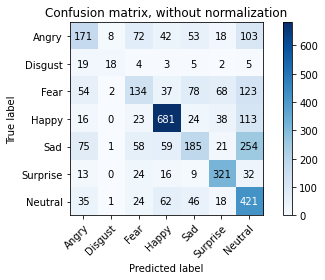

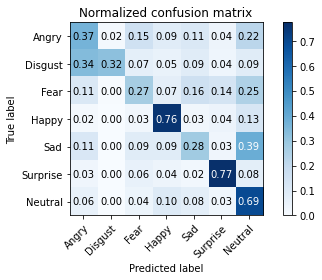

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_loaded.predict(X_test)
y_test_argmax = test_y.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('Normalized Valence Confusion Matrix for 2 class.png',bbox_inches='tight',dpi=300)

plt.show()

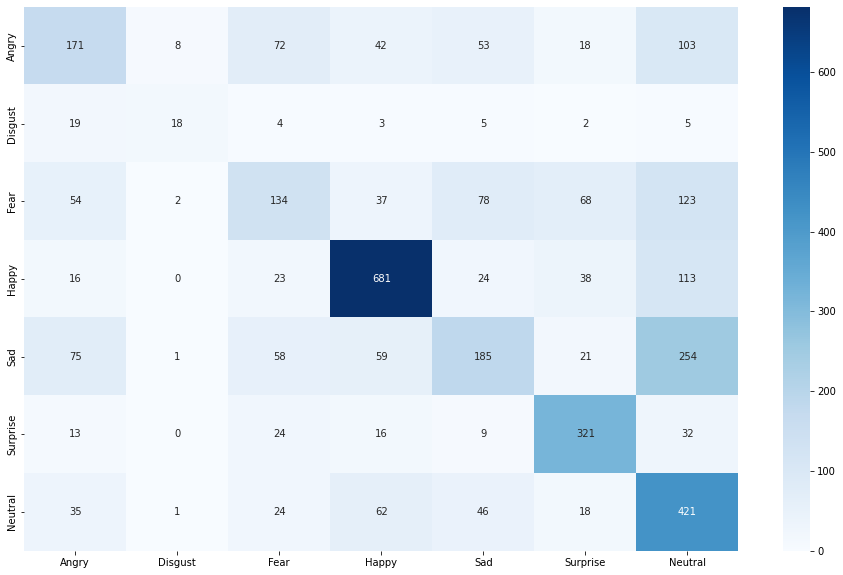

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model_loaded.predict(X_test)
y_test_argmax = test_y.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

class_names = np.array(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])



cm = confusion_matrix(y_test_argmax, y_pred_argmax)
plt.figure(figsize=(16,10))
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='.0f', xticklabels=class_names, yticklabels=class_names)

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')